In [47]:
import glob
import math
import os
import random

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydicom  # working with dicom
import pywt  # working with wavelets
from scipy import ndimage
from skimage import (util, color, exposure, feature, filters, img_as_float64,
                     img_as_ubyte, img_as_uint, measure, morphology,
                     restoration, segmentation)

In [48]:
img_dir = 'C:\\Users\\br_go\\Desktop\\CODE\\images'
data_path = os.path.join(img_dir, '*dcm')
files = glob.glob(data_path)
data = [] #list of original images

for file in files:
    dicom_file = pydicom.dcmread(file)
    img_array = dicom_file.pixel_array
    data.append(img_array) 

roi_1 = data[0][900:1200, 2600:2900]
roi_2 = data[1][1650:2150, 0:550]
roi_3 = data[2][2130:2360, 2270:2550]

(-0.5, 299.5, 299.5, -0.5)

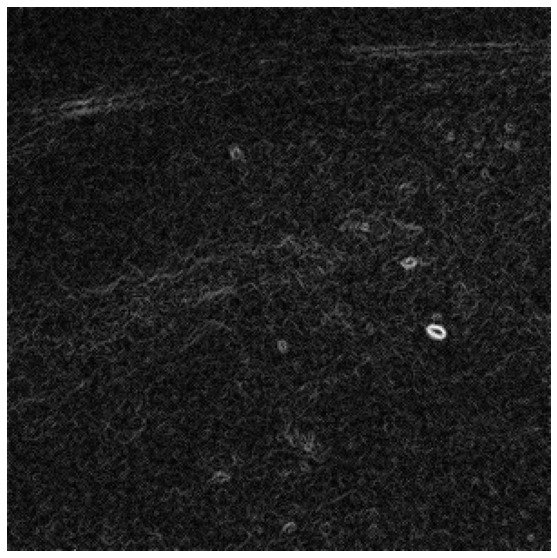

In [49]:
img = np.copy(roi_1)
img = img/4095

img_grad = np.gradient(img)
img_norm = np.linalg.norm(img_grad, axis=0)

r1 = 1/(1 + img_norm)
r1 = util.invert(r1)
img_r1 = r1*4095

plt.figure(figsize=(10,10))
plt.imshow(img_r1.astype('uint16'), cmap='gray')
plt.axis('off')

(-0.5, 299.5, 299.5, -0.5)

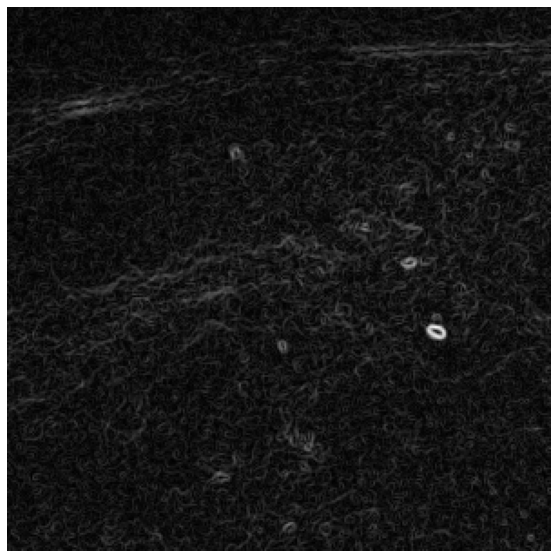

In [50]:
img_sobel = filters.sobel(img)
img_r2 = img_sobel*4095

plt.figure(figsize=(10,10))
plt.imshow(img_r2.astype('uint16'), cmap='gray')
plt.axis('off')

(-0.5, 299.5, 299.5, -0.5)

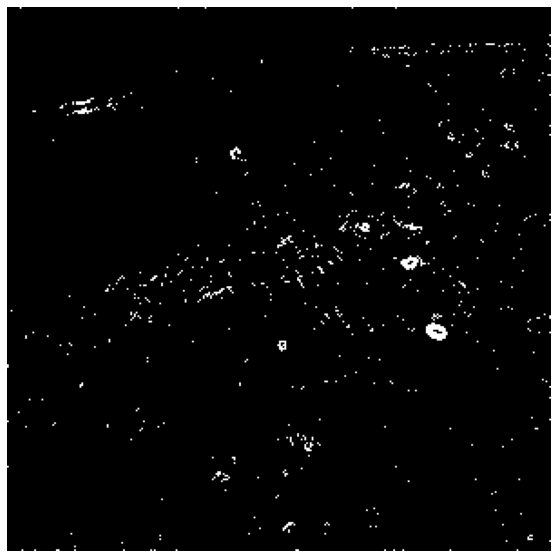

In [51]:
thresh_1 = filters.threshold_otsu(r1)
seg_1 = r1 >= 0.018

plt.figure(figsize=(10,10))
plt.imshow(seg_1, cmap='gray')
plt.axis('off')

(-0.5, 299.5, 299.5, -0.5)

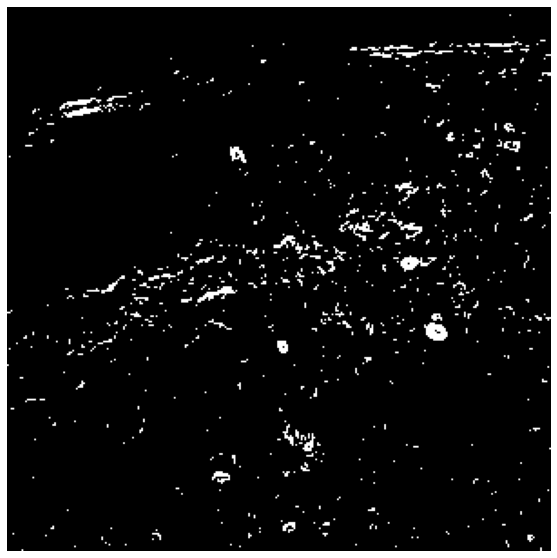

In [52]:
thresh_2 = filters.threshold_otsu(img_sobel)
seg_2 = img_sobel >= 0.018

plt.figure(figsize=(10,10))
plt.imshow(seg_2, cmap='gray')
plt.axis('off')

(-0.5, 299.5, 299.5, -0.5)

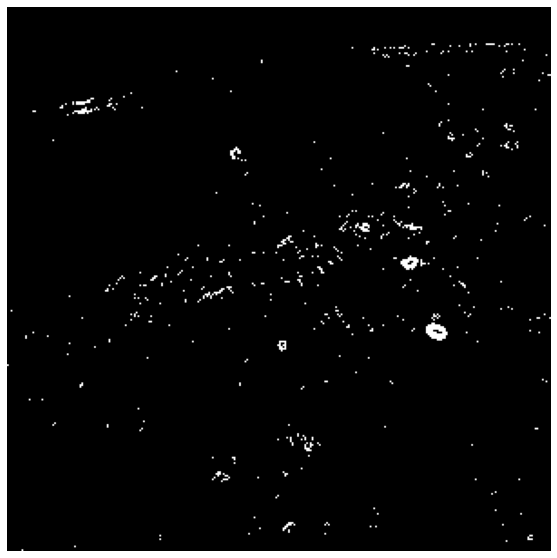

In [53]:
markers = np.logical_and(seg_1, seg_2)

plt.figure(figsize=(10,10))
plt.imshow(markers, cmap='gray')
plt.axis('off')

(-0.5, 299.5, 299.5, -0.5)

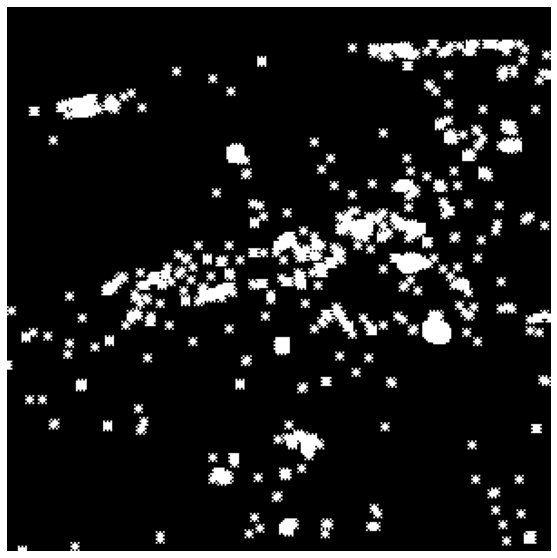

In [54]:
kernel = np.array([[1, 0, 1, 0, 1],
                   [0, 1, 1, 1, 0],
                   [1, 1, 1, 1, 1],
                   [0, 1, 1, 1, 0],
                   [1, 0, 1, 0, 1]])

morf_1 = ndimage.convolve(markers, kernel)

plt.figure(figsize=(10,10))
plt.imshow(morf_1, cmap='gray')
plt.axis('off')

(-0.5, 299.5, 299.5, -0.5)

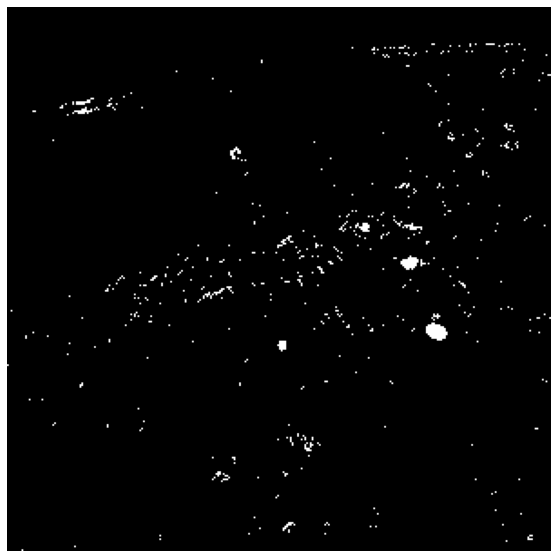

In [55]:
se = np.array([[0, 1, 0],
               [1, 1, 1],
               [0, 1, 0]])

morf_2 = morphology.dilation(morf_1, footprint=se)
morf_2 = morphology.reconstruction(seed=morf_2, mask=markers, method='erosion', footprint=se)

plt.figure(figsize=(10,10))
plt.imshow(morf_2, cmap='gray')
plt.axis('off')